WeatherPy

In [1]:
# Dependencies
import matplotlib.pyplot as plt
import requests
from scipy import stats
import pandas as pd
import numpy as np
import time

#Open Weather key import
from config import api_key

#citipy import to determine city based on longitude and latitude 
from citipy import citipy

units="imperial"

#Output csv
output = "Output/weather_df.csv"


In [2]:
#Temperature in F
units="imperial"

# Range of latitude and longitude
lat_range = (-90, 90)
lon_range = (-180, 180)

# define url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="

# define count of pass throughs
count = 0
set_initial = 1

In [8]:
#Empty lists for latitude/longitude and cities
lat_lons = []
cities = []

#Set of random latitude and longitude combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lons = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lons = zip(lats, lons)

#Find nearest city for each latitude/longitude combination
for lat_lon in lat_lons:
    city = citipy.nearest_city(lat_lon[0], lat_lon[1]).city_name
    
#Adding only unique cities
    if city not in cities:
        cities.append(city)

#Count of cities
len(cities)

# cities

631

In [4]:
# Test
# city='Chicago'
# response = requests.get(url + city).json()
# response


{'coord': {'lon': -87.65, 'lat': 41.85},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 66.25,
  'feels_like': 62.22,
  'temp_min': 64,
  'temp_max': 69.01,
  'pressure': 1014,
  'humidity': 59},
 'visibility': 10000,
 'wind': {'speed': 8.05, 'deg': 60},
 'clouds': {'all': 75},
 'dt': 1602443460,
 'sys': {'type': 1,
  'id': 4861,
  'country': 'US',
  'sunrise': 1602417528,
  'sunset': 1602458115},
 'timezone': -18000,
 'id': 4887398,
 'name': 'Chicago',
 'cod': 200}

In [9]:
#Empty lists for parameters
city_final = []
cloudiness_s = []
dates = []
humidities = []
lats = []
lons = []
max_temps = []
wind_speeds = []
countries = []

#set initial count
count = 0
set_initial = 1

#loop through cities to collect parameters 
for city in cities:
    try:
        response = requests.get(url + city.replace(" ","&")).json()
        cloudiness_s.append(response['clouds']['all'])
        countries.append(response['sys']['country'])
        dates.append(response['dt'])
        humidities.append(response['main']['humidity'])
        lats.append(response['coord']['lat'])
        lons.append(response['coord']['lon'])
        max_temps.append(response['main']['temp_max'])
        wind_speeds.append(response['wind']['speed'])
        if count > 48:
            count = 1
            set_initial += 1
            city_final.append(city)
        else:
            count += 1
            city_final.append(city)
        print(f"Line {count} of Set {set_initial} is being processed. City : {city}")
    except NameError:
        print("City not found. Move to the next one...")
print("Command completed")


Line 1 of Set 1 is being processed : bouza
Line 2 of Set 1 is being processed : castro
Line 3 of Set 1 is being processed : bandarbeyla
Line 4 of Set 1 is being processed : numan
Line 5 of Set 1 is being processed : rikitea
Line 6 of Set 1 is being processed : clyde river
Line 7 of Set 1 is being processed : ushuaia
Line 8 of Set 1 is being processed : at-bashi
Line 9 of Set 1 is being processed : mataura
Line 10 of Set 1 is being processed : chuy
Line 11 of Set 1 is being processed : mitu
Line 12 of Set 1 is being processed : jamestown
Line 13 of Set 1 is being processed : sobolevo
Line 14 of Set 1 is being processed : geraldton
Line 15 of Set 1 is being processed : aklavik
Line 16 of Set 1 is being processed : yerbogachen
City not found. Move to the next one...
Line 17 of Set 1 is being processed : mar del plata
Line 18 of Set 1 is being processed : adrar
Line 19 of Set 1 is being processed : hachinohe
Line 20 of Set 1 is being processed : codrington
Line 21 of Set 1 is being process

Line 18 of Set 4 is being processed : palmer
City not found. Move to the next one...
Line 19 of Set 4 is being processed : bubaque
Line 20 of Set 4 is being processed : grand-santi
Line 21 of Set 4 is being processed : linxia
Line 22 of Set 4 is being processed : erdenet
Line 23 of Set 4 is being processed : andreyevo
City not found. Move to the next one...
Line 24 of Set 4 is being processed : ixtapa
Line 25 of Set 4 is being processed : bethel
Line 26 of Set 4 is being processed : hanmer springs
Line 27 of Set 4 is being processed : kon tum
Line 28 of Set 4 is being processed : wajir
Line 29 of Set 4 is being processed : bambous virieux
Line 30 of Set 4 is being processed : uva
Line 31 of Set 4 is being processed : nouadhibou
Line 32 of Set 4 is being processed : sao filipe
Line 33 of Set 4 is being processed : touros
Line 34 of Set 4 is being processed : san cristobal
Line 35 of Set 4 is being processed : flinders
City not found. Move to the next one...
Line 36 of Set 4 is being pro

Line 31 of Set 7 is being processed : arlit
Line 32 of Set 7 is being processed : cayenne
Line 33 of Set 7 is being processed : airai
Line 34 of Set 7 is being processed : preobrazheniye
Line 35 of Set 7 is being processed : skibotn
Line 36 of Set 7 is being processed : bontang
Line 37 of Set 7 is being processed : iqaluit
Line 38 of Set 7 is being processed : pombas
Line 39 of Set 7 is being processed : nongstoin
City not found. Move to the next one...
Line 40 of Set 7 is being processed : tuatapere
Line 41 of Set 7 is being processed : fonte boa
Line 42 of Set 7 is being processed : mezhdurechensk
Line 43 of Set 7 is being processed : port macquarie
City not found. Move to the next one...
Line 44 of Set 7 is being processed : aloleng
Line 45 of Set 7 is being processed : diapaga
Line 46 of Set 7 is being processed : dingle
Line 47 of Set 7 is being processed : aguimes
Line 48 of Set 7 is being processed : baoying
City not found. Move to the next one...
Line 49 of Set 7 is being proce

Line 46 of Set 10 is being processed : davila
Line 47 of Set 10 is being processed : lichinga
Line 48 of Set 10 is being processed : odweyne
Line 49 of Set 10 is being processed : ulladulla
Line 1 of Set 11 is being processed : kidal
City not found. Move to the next one...
Line 2 of Set 11 is being processed : baruun-urt
Line 3 of Set 11 is being processed : lagoa
Line 4 of Set 11 is being processed : port angeles
Line 5 of Set 11 is being processed : kysyl-syr
Line 6 of Set 11 is being processed : aksarka
Line 7 of Set 11 is being processed : kerchevskiy
Line 8 of Set 11 is being processed : asau
Line 9 of Set 11 is being processed : port augusta
Line 10 of Set 11 is being processed : cangzhou
Line 11 of Set 11 is being processed : warangal
Line 12 of Set 11 is being processed : sahuaripa
Line 13 of Set 11 is being processed : caxito
Line 14 of Set 11 is being processed : puerto montt
Line 15 of Set 11 is being processed : ulaangom
Line 16 of Set 11 is being processed : hwange
Line 17

In [12]:
#Create data dictionary 
weather_df = pd.DataFrame ({
    "City":city_final
    ,"Cloudiness":cloudiness_s
    ,"Country":countries
    ,"Date":dates 
    ,"Humidity":humidities
    ,"Latitude":lats
    ,"Longitude":lons
    ,"Maximum Temperature":max_temps
    ,"Wind Speed":wind_speeds       
})
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,bouza,0,NE,1602444005,18,14.42,6.04,93.97,5.08
1,castro,0,BR,1602443806,47,-24.79,-50.01,72.99,3.33
2,bandarbeyla,26,SO,1602443837,77,9.49,50.81,78.73,4.16
3,numan,81,NG,1602444006,77,9.47,12.03,79.56,6.02
4,rikitea,47,PF,1602443801,78,-23.12,-134.97,73.90,13.11


In [13]:
#print to csv
weather_df.to_csv(output)


In [14]:
# weather_df.count()
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Latitude,Longitude,Maximum Temperature,Wind Speed
0,bouza,0,NE,1602444005,18,14.42,6.04,93.97,5.08
1,castro,0,BR,1602443806,47,-24.79,-50.01,72.99,3.33
2,bandarbeyla,26,SO,1602443837,77,9.49,50.81,78.73,4.16
3,numan,81,NG,1602444006,77,9.47,12.03,79.56,6.02
4,rikitea,47,PF,1602443801,78,-23.12,-134.97,73.90,13.11


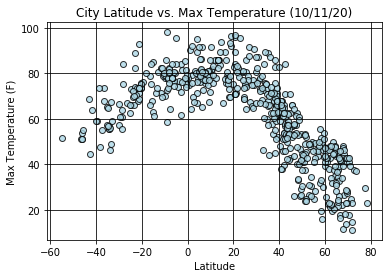

In [15]:
#Scatter plot: Temperature (F) vs. Latitude
plt.scatter(weather_df["Latitude"], weather_df["Maximum Temperature"],
            edgecolors="black", facecolors="lightblue", alpha=0.8)
plt.title("City Latitude vs. Max Temperature (10/11/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (linestyle="-",color="black")

plt.savefig("Images/Figure1.png")

plt.show()


As show on the graph above, based on the analysis of 500+ cities, highest temperatures were associated with Latitudes on or around the equator (or 0 degree latitude). The further the cities were located from the equator the lower the temperatures destributed were (hence the bell curve). 

<function matplotlib.pyplot.show>

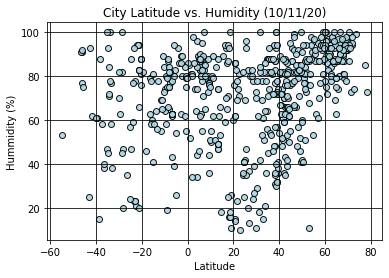

In [16]:
#Scatter plot: Hummidity (%) vs Latitude
plt.scatter(weather_df["Latitude"], weather_df['Humidity'], 
            edgecolor='black', facecolor='lightblue', alpha=0.9)
plt.title("City Latitude vs. Humidity (10/11/20)")
plt.xlabel('Latitude')
plt.ylabel('Hummidity (%)')
plt.grid (linestyle="-",color="black")

plt.savefig('Images/Figure2.png')

plt.show


As shown on the graph above, no strong correlation was observed between the Humidity levels and Latitudes. However, it does appear that Northern Hemisphere tends to be more humid.  

<function matplotlib.pyplot.show>

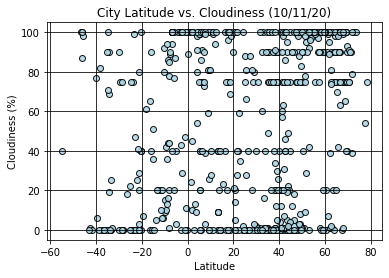

In [17]:
#Scatter plot: Cloudiness (%) vs Latitude
plt.scatter(weather_df["Latitude"], weather_df['Cloudiness'], 
            edgecolor='black', facecolor='lightblue', alpha=0.9)
plt.title("City Latitude vs. Cloudiness (10/11/20)")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid (linestyle="-",color="black")

plt.savefig('Images/Figure3.png')

plt.show

As demonstrated on the plot above, no strong relationship was observed between the Latitude and Cloudiness. 

<function matplotlib.pyplot.show>

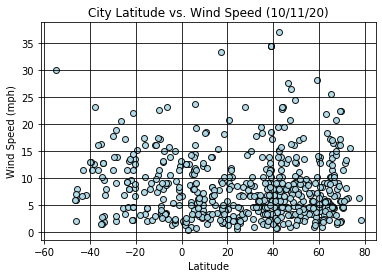

In [18]:
#Scatter plot: Wind Speed (mph) vs Latitude
plt.scatter(weather_df["Latitude"], weather_df['Wind Speed'], 
            edgecolor='black', facecolor='lightblue', alpha=0.9)
plt.title("City Latitude vs. Wind Speed (10/11/20)")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid (linestyle="-",color="black")

plt.savefig('Images/Figure4.png')

plt.show

No strong relationship was observed between Latitude and Wind Speed. 

In [ ]:
#Liner Regression
# Northern Hemisphere - Temperature (F) vs. Latitude
# Southern Hemisphere - Temperature (F) vs. Latitude
# Northern Hemisphere - Humidity (%) vs. Latitude
# Southern Hemisphere - Humidity (%) vs. Latitude
# Northern Hemisphere - Cloudiness (%) vs. Latitude
# Southern Hemisphere - Cloudiness (%) vs. Latitude
# Northern Hemisphere - Wind Speed (mph) vs. Latitude
# Southern Hemisphere - Wind Speed (mph) vs. Latitude


